# Animal Related Service calls in San Antonio 
The purpose of the project was to show the number of calls received in San Antonio related to animals. The calls are received by 311, then placed in a csv file that contains all the calls received. The public data set is provided by the City of San Antonio at, data.sanantonio.gov/dataset. 


## Import necessary libraries 

In [134]:
import pandas as pd
import requests
import numpy as np
from io import StringIO



## Import the csv files and pandas to read the csv. 

In [135]:
url = "https://data.sanantonio.gov/dataset/93b0e7ee-3a55-4aa9-b27b-d1817e91aec3/resource/e77257d9-79af-4ac8-a794-6470e01f9f23/download/allservice_animals.csv"
col_names = ["_id", "Category", "CASEID", "OPENEDDATETIME", "SLA_date", "CLOSEDDATETIME", "Late(Yes/No)", "Dept", "REASONNAME", "TPYENAME", "CaseStatus", "SourceID","OBJECTDESC", "Council District", "XCOORD", "YCOORD", "Reporting Starting Date", "Reporting Ending Date"]
response = requests.get(url, verify=False)  # Bypass SSL verification
if response.status_code == 200:
    data = pd.read_csv(StringIO(response.text))
    print(data.head())
else:
    print(f"Error fetching the CSV: HTTP {response.status_code}")

/Users/main/anaconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.sanantonio.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/main/anaconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'og-production-open-data-sanantoniotx-892364687672.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


  ï»¿Category      CASEID OPENEDDATETIME   SLA_Date CLOSEDDATETIME  \
0     Animals  1015248998       2/2/2019  2/16/2019            NaN   
1     Animals  1015260515       2/6/2019  2/20/2019            NaN   
2     Animals  1015326342       3/4/2019  3/18/2019            NaN   
3     Animals  1015352127      3/13/2019  3/27/2019            NaN   
4     Animals  1015384771      3/25/2019   4/8/2019            NaN   

  Late (Yes/No)                  Dept        REASONNAME  \
0           YES  Animal Care Services  Field Operations   
1           YES  Animal Care Services  Field Operations   
2           YES  Animal Care Services  Field Operations   
3           YES  Animal Care Services  Field Operations   
4           YES  Animal Care Services  Field Operations   

                 TYPENAME CaseStatus          SourceID  \
0  Animal Permits Request       Open  Constituent Call   
1  Animal Permits Request       Open  Constituent Call   
2  Animal Permits Request       Open  Constituent 

## Verify dataframe was read successfully

In [136]:
data.head()

,ï»¿Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Animals,1015248998,2/2/2019,2/16/2019,NaN,YES,Animal Care Services,Field Operations,Animal Permits Request,Open,Constituent Call,"2033 FRIO CITY RD, San Antonio, 78226",5,2114624.0,13689978.0,4/6/2023,4/6/2024
1,Animals,1015260515,2/6/2019,2/20/2019,NaN,YES,Animal Care Services,Field Operations,Animal Permits Request,Open,Constituent Call,"2018 FITCH ST, San Antonio, 78211",5,2116303.0,13682489.0,4/6/2023,4/6/2024
2,Animals,1015326342,3/4/2019,3/18/2019,NaN,YES,Animal Care Services,Field Operations,Animal Permits Request,Open,Constituent Call,"117 LORETTA, San Antonio, 78210",5,2132578.0,13692347.0,4/6/2023,4/6/2024
3,Animals,1015352127,3/13/2019,3/27/2019,NaN,YES,Animal Care Services,Field Operations,Animal Permits Request,Open,Constituent Call,"4032 E SOUTHCROSS, San Antonio, 78222",3,2154623.0,13684095.0,4/6/2023,4/6/2024
4,Animals,1015384771,3/25/2019,4/8/2019,NaN,YES,Animal Care Services,Field Operations,Animal Permits Request,Open,Constituent Call,"314 PRESTWICK, San Antonio, 78223",3,2146576.0,13684526.0,4/6/2023,4/6/2024


### Number of rows in dataset

In [137]:
len(data)

119339

### Numbers of distinct values in a column

In [138]:
unique_values_counts = data.nunique()
unique_values_counts

ï»¿Category                  1
CASEID                  119339
OPENEDDATETIME            1589
SLA_Date                  1656
CLOSEDDATETIME             367
Late (Yes/No)                2
Dept                         1
REASONNAME                   1
TYPENAME                    21
CaseStatus                   2
SourceID                     2
OBJECTDESC               62750
Council District            11
XCOORD                   45124
YCOORD                   43518
Report Starting Date         1
Report Ending Date           1
dtype: int64

## Specific Categories inside the TYPENAME column

In [139]:
TYPENAME_COUNT = data['TYPENAME'].unique()
TYPENAME_COUNT 


array(['Animal Permits Request', 'Aggressive Animal(Non-Critical)',
       'Animal Neglect', 'Public Nuisance(Own Animal)',
       'Aggressive Animal(Multiple Requests)',
       'Aggressive Animal(Critical)', 'Injured Animal(Critical)',
       'Animals(Stray Animal)', 'Cruelty-Neglect(Animal Cruelty)',
       'Animals(Aggressive Non-Critical)',
       'Cruelty Neglect(Animal Neglect)', 'Animals(Aggressive Critical)',
       'Trapped/Confined', 'Animal Bite(Non-Critical)',
       'Injured-Sick Animal', 'Animals(Public Nuisance)',
       'Officer Standby', 'Animals(Animal Sales)',
       'Animals(Animal Permits)', 'Animal Bite(Critical)', 'Third Shift'],
      dtype=object)

In [140]:
TYPENAME_DESC = data['TYPENAME'].describe()
TYPENAME_DESC

count                               119339
unique                                  21
top       Animals(Aggressive Non-Critical)
freq                                 31839
Name: TYPENAME, dtype: object

### Each 311 call category related to animals.  

In [141]:
TYPENAME_COUNT = data['TYPENAME'].value_counts()

TYPENAME_COUNT

Animals(Aggressive Non-Critical)        31839
Animals(Stray Animal)                   22687
Cruelty Neglect(Animal Neglect)         15349
Injured-Sick Animal                     12768
Animals(Public Nuisance)                11011
Trapped/Confined                         6868
Animals(Aggressive Critical)             6690
Animal Bite(Non-Critical)                2779
Officer Standby                          2352
Animals(Animal Permits)                  2215
Animal Bite(Critical)                    1914
Cruelty-Neglect(Animal Cruelty)          1539
Third Shift                              1002
Animals(Animal Sales)                     263
Animal Permits Request                     29
Aggressive Animal(Non-Critical)            14
Animal Neglect                             13
Aggressive Animal(Critical)                 3
Public Nuisance(Own Animal)                 2
Injured Animal(Critical)                    1
Aggressive Animal(Multiple Requests)        1
Name: TYPENAME, dtype: int64

<Axes: title={'center': 'Total calls by Category'}>

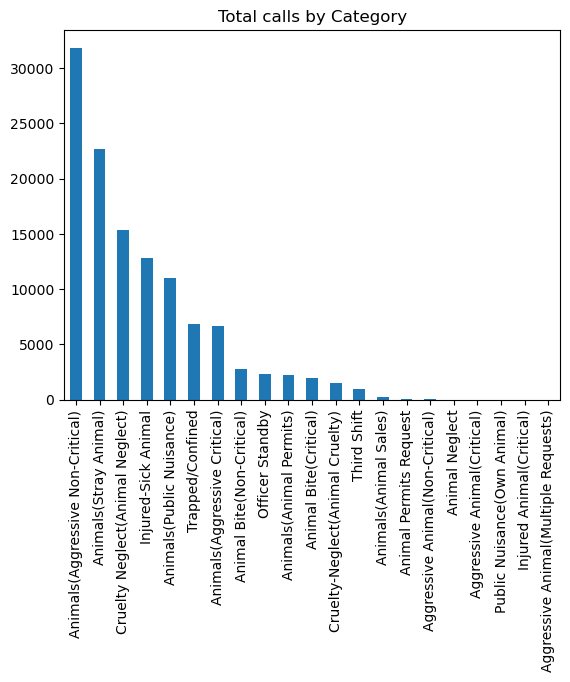

In [142]:
# CREATE A BaR GRAPH
TYPENAME_COUNT_BAR = TYPENAME_COUNT.plot.bar()
plt.title("Total calls by Category")
TYPENAME_COUNT_BAR


## Number of Animal Calls per District 


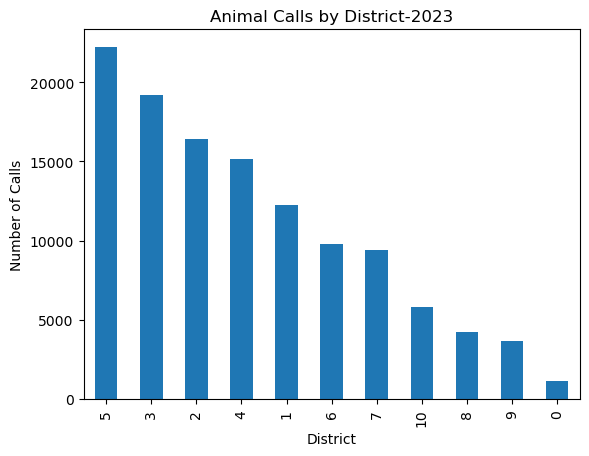

<Axes: title={'center': 'Animal Calls by District-2023'}, xlabel='District', ylabel='Number of Calls'>

In [143]:
import matplotlib.pyplot as plt

District_Count = data['Council District'].value_counts().plot(kind = 'bar')
plt.title("Animal Calls by District-2023")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()
District_Count

## Create a new Data Frame that only has Animal Calls from 2023

In [144]:
# CONVERT datetime format
data['OPENEDDATETIME'] = pd.to_datetime(data['OPENEDDATETIME'])

# Create new df with only OPENEDDATETIME
data_2023 = data[data['OPENEDDATETIME'].dt.year == 2023]
data_2023.head()

,ï»¿Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
16797,Animals,1018219942,2023-01-01,1/6/2023,1/1/2024,YES,Animal Care Services,Field Operations,Animals(Aggressive Non-Critical),Closed,Constituent Call,MORALES and N COLORADO ST,5,2124338.0,13704818.0,4/6/2023,4/6/2024
16798,Animals,1018220028,2023-01-01,1/6/2023,10/26/2023,YES,Animal Care Services,Field Operations,Animals(Aggressive Non-Critical),Closed,Constituent Call,"527 F ST, SAN ANTONIO, 78220",2,2146878.0,13696572.0,4/6/2023,4/6/2024
16799,Animals,1018220097,2023-01-01,1/11/2023,NaN,YES,Animal Care Services,Field Operations,Animal Bite(Critical),Open,Constituent Call,"12610 CISCO BLVD, SAN ANTONIO, 78217",10,2158794.0,13750193.0,4/6/2023,4/6/2024
16800,Animals,1018220118,2023-01-01,1/11/2023,7/23/2023,YES,Animal Care Services,Field Operations,Animal Bite(Critical),Closed,Constituent Call,"715 RUIZ ST, SAN ANTONIO, 78207",5,2123512.0,13706171.0,4/6/2023,4/6/2024
16801,Animals,1018220213,2023-01-01,1/4/2023,NaN,YES,Animal Care Services,Field Operations,Cruelty Neglect(Animal Neglect),Open,Constituent Call,"111 PROBANDT ST, SAN ANTONIO, 78204",5,2128961.0,13695952.0,4/6/2023,4/6/2024


## Total Animal related calls for 2023

In [145]:
total_2023_calls = len(data_2023)
print(f"Total Animal Related calls for 2023: {total_2023_calls} ")

Total Animal Related calls for 2023: 76349 


## Number of Animal Related Calls by district 

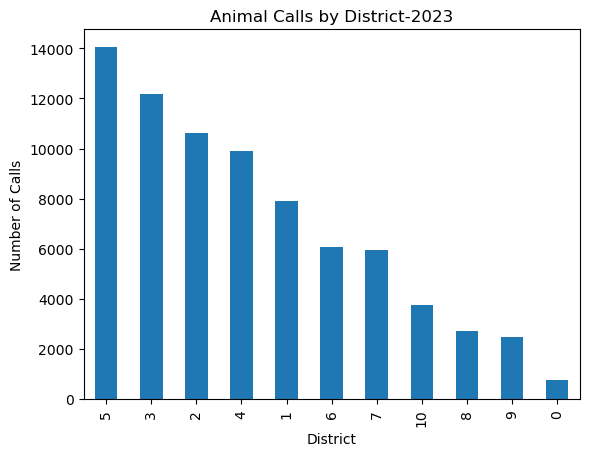

<Axes: title={'center': 'Animal Calls by District-2023'}, xlabel='District', ylabel='Number of Calls'>

In [146]:
District_Count_2023 = data_2023['Council District'].value_counts().plot(kind = 'bar')
plt.title("Animal Calls by District-2023")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()
District_Count_2023

## Number of Calls based on Type

In [147]:
TYPENAME_COUNT_2023 = data_2023['TYPENAME'].value_counts()

TYPENAME_COUNT_2023

Animals(Aggressive Non-Critical)    19029
Animals(Stray Animal)               16408
Injured-Sick Animal                  8784
Cruelty Neglect(Animal Neglect)      8653
Animals(Public Nuisance)             7656
Trapped/Confined                     4689
Animals(Aggressive Critical)         4022
Animal Bite(Non-Critical)            1607
Officer Standby                      1576
Animal Bite(Critical)                1143
Animals(Animal Permits)              1051
Cruelty-Neglect(Animal Cruelty)       826
Third Shift                           729
Animals(Animal Sales)                 176
Name: TYPENAME, dtype: int64

## Create dataframe to map calls on a map


In [148]:
map_2023 = data_2023[['TYPENAME', 'XCOORD','YCOORD']]
map_2023.head()


,TYPENAME,XCOORD,YCOORD
16797,Animals(Aggressive Non-Critical),2124338.0,13704818.0
16798,Animals(Aggressive Non-Critical),2146878.0,13696572.0
16799,Animal Bite(Critical),2158794.0,13750193.0
16800,Animal Bite(Critical),2123512.0,13706171.0
16801,Cruelty Neglect(Animal Neglect),2128961.0,13695952.0


In [149]:
map_2023 = data.dropna(subset=['XCOORD', 'YCOORD'])


## Import geopandas and create point objets from x and y coordinates. 
Note: State Plane Coordinate System (SPCS83 Code TX-4204)

In [150]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj


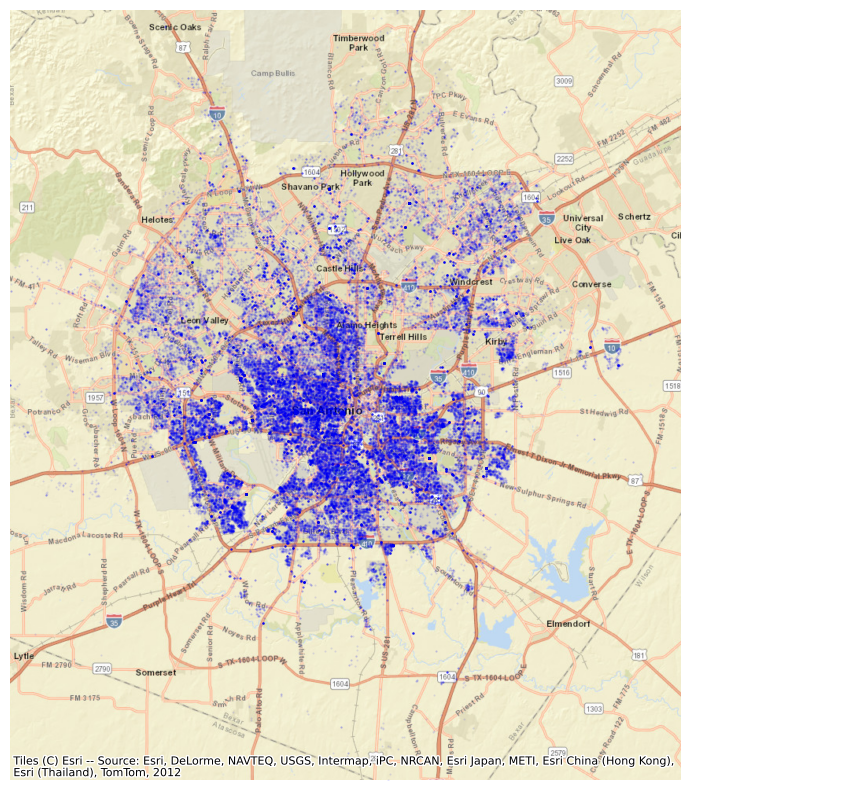

In [151]:
import geopandas as gpd
import pyproj
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt
# Assuming 'map_2023' is your DataFrame and has the 'XCOORD' and 'YCOORD' columns

# Define the source CRS (Coordinate Reference System)
source_crs = pyproj.CRS("ESRI:102740")

# Define the target CRS
target_crs = pyproj.CRS("EPSG:4326")

# Create a transformer
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Project to WGS 84 (latitude/longitude)
projected_points = [transformer.transform(x, y) for x, y in zip(map_2023['XCOORD'], map_2023['YCOORD'])]

# Convert the projected coordinates back to Point objects
geometry = [Point(xy) for xy in projected_points]

# Now we can create the GeoDataFrame with WGS 84 CRS
geo_df = gpd.GeoDataFrame(map_2023, geometry=geometry, crs=target_crs.to_string())

# Convert the GeoDataFrame to Web Mercator CRS for use with contextily
geo_df = geo_df.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
geo_df.plot(ax=ax, color='blue', markersize=.25, alpha=0.1)  # Adjust markersize as needed

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# Set the axis limits to the bounds of the points
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Ensure the aspect ratio is equal
ax.set_aspect('equal')

# Hide the axis
ax.axis('off')

plt.show()


##Clean-up Geo Data Frame to make more readable. 

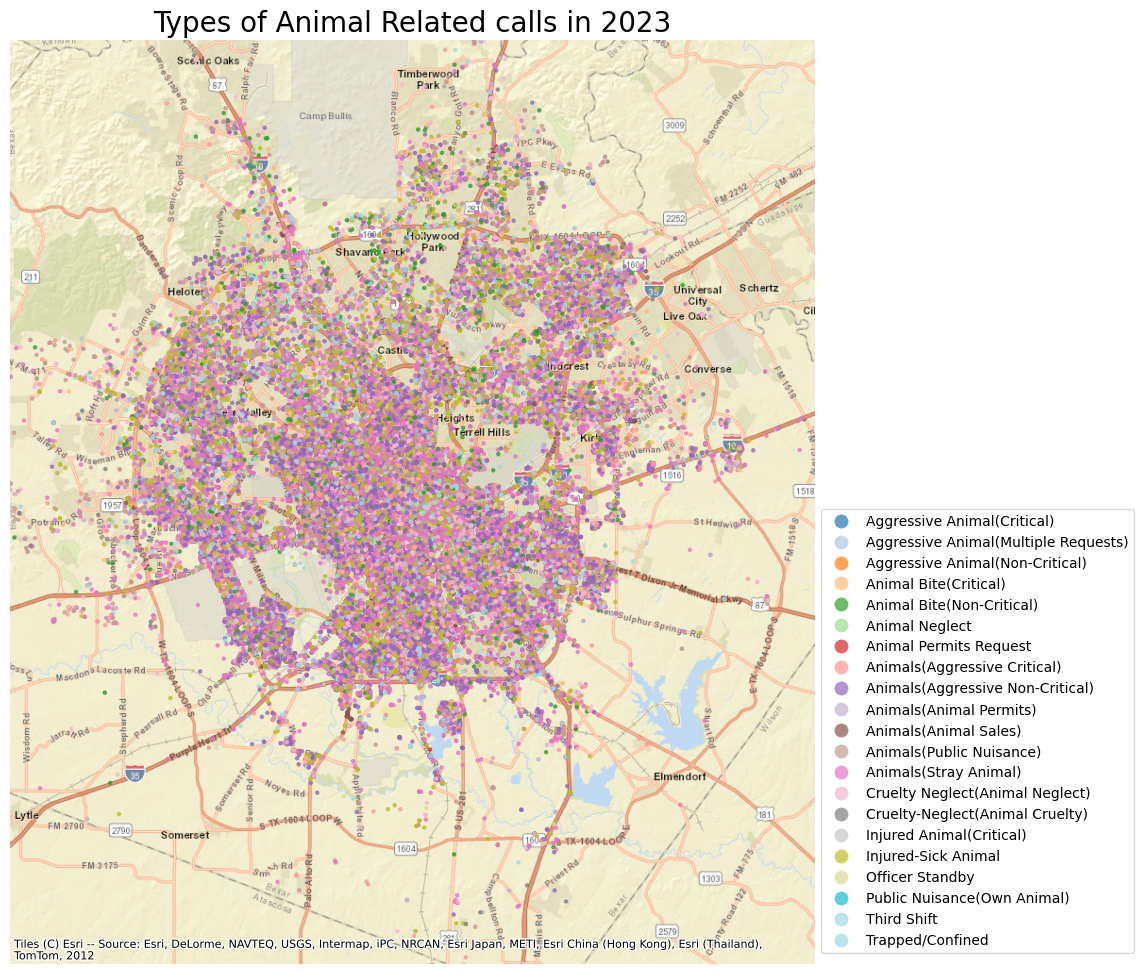

In [152]:
import matplotlib
# Create a categorical color map
color_map = matplotlib.colormaps.get_cmap('tab20')

# Plotting with color based on 'TYPENAME'
fig, ax = plt.subplots(figsize=(12, 12), dpi=100)
geo_df.plot(ax=ax, column='TYPENAME', cmap=color_map, legend=True, markersize=5, alpha=0.7)

# Add the base map
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# Set the axis limits to the bounds of the points
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Ensure the aspect ratio is equal
ax.set_aspect('equal')

# Hide the axis for a cleaner look
ax.axis('off')

# Move the legend outside of the plot area
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
plt.title('Types of Animal Related calls in 2023', fontsize = 20)
plt.show()